In [1]:
import glob
import json
import math
import pandas as pd
import numpy as np

In [2]:
# files = glob.glob('../hadian_R_D/*/*.json',recursive = True)
files = glob.glob('../Decision_tree/data_sample/*')
raw_data = []
data=[]
raw_data = []
data=[]

In [3]:
for hit in files:
     with open(hit) as f:
            raw_data.append(json.load(f))

In [4]:
len(raw_data)

6549

In [5]:
def stdev_N_1(list):
    leng = len(list)
    if leng==1:
        leng=2
    m = mean(list)
    s_2=0
    for num in list:
         s_2 += (num - m)**2
    s= math.sqrt(s_2/(leng -1))
    return s

In [6]:
def mean(list):
    try :
        avg = sum(list) / len(list)
        return avg
    except:
        return -1

In [7]:
def Max(list):
    try:
        return max(list)
    except:
        return -1

In [8]:
def Min(list):
    try:
        return min(list)
    except:
        return -1

In [9]:
def Features(dic):
    """
    making featurs
    input : output of Tshark command's as dict
    :return: add fearturs key to dict
    """
    #    variable for calculating featurse
    send_packet_duration, send_packet_size, receive_packet_duration, receive_packet_size = [], [], [], []
    send_time, receive_time = [], []

    #   variable for calculating sequence of packets
    no_send_packet, no_receive_packet, no_packet = 0, 0, 0
    send_seq, receive_seq = 0, 0
    sequence_send_packet, sequence_receive_packet = [], []
   
    for val in dic['packet_list']:
        no_packet += 1
        if val['direction'] == 0:  # send
            if val['payload_size'] != 0 :
                send_packet_size.append(val['payload_size'])
            if len(send_time)>0:    
                send_packet_duration.append(val['time'] - send_time[-1])
                send_time.append(val['time'])
            else:
                send_time.append(val['time'])
            

            if no_packet - no_send_packet == 1:
                send_seq += 1
            else:
                sequence_send_packet.append(send_seq)
                send_seq = 1
            no_send_packet = no_packet
        if val['direction'] == 1:  # recieve
            if val['payload_size'] != 0:
                receive_packet_size.append(val['payload_size'])
            if len(receive_time)>0:    
                receive_packet_duration.append(val['time'] - receive_time[-1])
                receive_time.append(val['time'])
            else:
                receive_time.append(val['time'])    
                
            



            if no_packet - no_receive_packet == 1:
                receive_seq += 1
            else:
                sequence_receive_packet.append(receive_seq)
                receive_seq = 1
            no_receive_packet = no_packet
    sequence_send_packet.append(send_seq)
    sequence_receive_packet.append(receive_seq)

    dic['features'] = { "tag":dic['five_tuple']['tag'],
                        "port" : dic['five_tuple']['dst_port'],
                        "l4proto" : dic['five_tuple']['l4proto'],
                        "l7proto" : dic['five_tuple']['l7proto'],
                        "avg_receive_packet_duration": mean(receive_packet_duration),
                        "avg_receive_packet_size":  mean(receive_packet_size),
                        "avg_send_packet_duration": mean(send_packet_duration),
                        "avg_send_packet_size": mean(send_packet_size),
                        "max_receive_packet_duration": Max(receive_packet_duration),
                        "max_receive_packet_size": Max(receive_packet_size),
                        "max_receive_sequence_packet_count":Max(sequence_receive_packet),
                        "max_send_packet_duration":  Max(send_packet_duration),
                        "max_send_packet_size": Max(send_packet_size),
                        "max_send_sequence_packet_count": Max(sequence_send_packet),
                        "min_receive_packet_duration": Min(receive_packet_duration),
                        "min_receive_packet_size": Min(receive_packet_size),
                        "min_send_packet_duration": Min(send_packet_duration),
                        "min_send_packet_size": Min(send_packet_size),
                        "stddev_receive_packet_duration": stdev_N_1(receive_packet_duration),
                        "stddev_receive_packet_size": stdev_N_1(receive_packet_size),
                        "stddev_send_packet_duration": stdev_N_1(send_packet_duration),
                        "stddev_send_packet_size": stdev_N_1(send_packet_size)}

    return dic['features']

In [10]:
for d in raw_data:
    data.append(Features(d))

In [11]:
df = pd.DataFrame(data)

In [12]:
data ,raw_data=0,0

In [13]:
df.head()

,tag,port,l4proto,l7proto,avg_receive_packet_duration,avg_receive_packet_size,avg_send_packet_duration,avg_send_packet_size,max_receive_packet_duration,max_receive_packet_size,...,max_send_packet_size,max_send_sequence_packet_count,min_receive_packet_duration,min_receive_packet_size,min_send_packet_duration,min_send_packet_size,stddev_receive_packet_duration,stddev_receive_packet_size,stddev_send_packet_duration,stddev_send_packet_size
0,None,443,6,TLS,708.166667,874.500000,1343.750000,91.500000,2540,1288,...,214,2,0,262,0,24,1007.538072,458.788622,2143.566704,83.815273
1,None,443,6,TLS,101.250000,400.200000,148.714286,592.000000,276,1133,...,1037,2,0,27,1,200,129.302248,496.192201,127.963164,421.009501
2,None,443,6,TLS,64.166667,704.333333,2068.000000,273.666667,120,1381,...,464,2,0,151,2,48,51.673655,624.206163,5260.053073,210.238753
3,None,443,6,TLS,62.000000,94.500000,93.166667,205.000000,173,144,...,382,3,0,45,0,32,85.895285,70.003571,100.232563,175.034282
4,None,53,17,DNS,103.000000,-1.000000,5.000000,-1.000000,103,-1,...,-1,2,103,-1,5,-1,0.000000,-0.000000,0.000000,-0.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6549 entries, 0 to 6548
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   tag                                341 non-null    object 
 1   port                               6549 non-null   int64  
 2   l4proto                            6549 non-null   int64  
 3   l7proto                            6549 non-null   object 
 4   avg_receive_packet_duration        6549 non-null   float64
 5   avg_receive_packet_size            6549 non-null   float64
 6   avg_send_packet_duration           6549 non-null   float64
 7   avg_send_packet_size               6549 non-null   float64
 8   max_receive_packet_duration        6549 non-null   int64  
 9   max_receive_packet_size            6549 non-null   int64  
 10  max_receive_sequence_packet_count  6549 non-null   int64  
 11  max_send_packet_duration           6549 non-null   int64

In [15]:
# df['port'] = df['port'].astype('str')
# df['port'] =  df['port'].astype('category')
# df['l4proto'] = df['l4proto'].astype('str')
df['l4proto'] = df['l4proto'].astype('category')
df['l7proto'] = df['l7proto'].astype('category')

In [16]:
# df['l7proto']=df['l7proto'].where(df['l7proto'].notnull(), None)
df['l7proto'] = df['l7proto'].replace([''], ['null'])
df['tag'] = df['tag'].replace([None], ['None'])

In [17]:
df['l7proto'].unique()

array(['TLS', 'DNS', 'HTTP', 'null', 'ESP'], dtype=object)

In [18]:
df['port'].unique()

array([  443,    53,    80,  7230,    82,   809,  7275,  7500,  7070,
       18459, 58195,  7626,  8800,   123,  5222, 17000,  9090,  8181,
        3389,  2358, 42156, 49397,  8764,   810,  8765, 47447,  8085,
        1313,  1433,  9031,   445,  1002,  7541,   811,   805, 60551,
        9002,  5223,  1021, 10000, 31747,  7395,   504,  9826,  7795,
        5228, 40093,  3478, 52607,  3289,   806,  9595, 48331,   807,
       27028,   998, 12154,  8000, 19000,  5053,  8013,    88,  6006,
        8443,   801,  5229,    22, 35294, 32100,  8070, 55071,  6674,
        7825,   500, 23456,   993, 54204,  5245, 40784,  1818, 56119,
        1194,  7072, 55125, 19562,  6568,  8080, 38840,  7006, 11393,
        6105, 18760,  3128,   790,  8261,  3112,  3593,   804, 40870,
        8900, 53708,   812, 39772, 22146, 42167,  5060, 40003, 20489,
       48620, 51634,  8001, 31572,    84,  3030,  4425, 20002,  6615,
       10315, 32154, 17777,  8700, 31944,  5694,  5800,  8089, 26312,
        1884,   110,

In [19]:
df['tag'].unique()

array(['None', 'instagram'], dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# df['port_cat'] = labelencoder.fit_transform(df['port'])
df['l4proto_cat'] = labelencoder.fit_transform(df['l4proto'])
df['l7proto_cat'] = labelencoder.fit_transform(df['l7proto'])

In [21]:
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder(handle_unknown='ignore')
# enc_port = pd.DataFrame(enc.fit_transform(df[['port_cat','l4proto_cat','l7proto_cat']]).toarray())
enc_port = pd.DataFrame(enc.fit_transform(df[['l4proto_cat','l7proto_cat']]).toarray())
df = df.join(enc_port)

In [22]:
# df.drop('port_cat',inplace=True,axis=1)
df.drop('l4proto_cat',inplace=True,axis=1)
df.drop('l7proto_cat',inplace=True,axis=1)
df.drop('l4proto',inplace=True,axis=1)
df.drop('l7proto',inplace=True,axis=1)

In [23]:
df.columns

Index([                              'tag',
                                    'port',
             'avg_receive_packet_duration',
                 'avg_receive_packet_size',
                'avg_send_packet_duration',
                    'avg_send_packet_size',
             'max_receive_packet_duration',
                 'max_receive_packet_size',
       'max_receive_sequence_packet_count',
                'max_send_packet_duration',
                    'max_send_packet_size',
          'max_send_sequence_packet_count',
             'min_receive_packet_duration',
                 'min_receive_packet_size',
                'min_send_packet_duration',
                    'min_send_packet_size',
          'stddev_receive_packet_duration',
              'stddev_receive_packet_size',
             'stddev_send_packet_duration',
                 'stddev_send_packet_size',
                                         0,
                                         1,
                                

In [24]:
df.head()

,tag,port,avg_receive_packet_duration,avg_receive_packet_size,avg_send_packet_duration,avg_send_packet_size,max_receive_packet_duration,max_receive_packet_size,max_receive_sequence_packet_count,max_send_packet_duration,...,stddev_receive_packet_size,stddev_send_packet_duration,stddev_send_packet_size,0,1,2,3,4,5,6
0,None,443,708.166667,874.500000,1343.750000,91.500000,2540,1288,4,6500,...,458.788622,2143.566704,83.815273,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,None,443,101.250000,400.200000,148.714286,592.000000,276,1133,5,263,...,496.192201,127.963164,421.009501,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,None,443,64.166667,704.333333,2068.000000,273.666667,120,1381,3,13996,...,624.206163,5260.053073,210.238753,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,None,443,62.000000,94.500000,93.166667,205.000000,173,144,4,216,...,70.003571,100.232563,175.034282,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,None,53,103.000000,-1.000000,5.000000,-1.000000,103,-1,2,5,...,-0.000000,0.000000,-0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [25]:
array = df.values
X = array[:,1:]
Y = array[:,0]

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [27]:
rescaledX = scaler.fit_transform(X)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split( 
    rescaledX, Y, test_size = 0.3, random_state = 100)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Text(0, 0.5, 'acc')

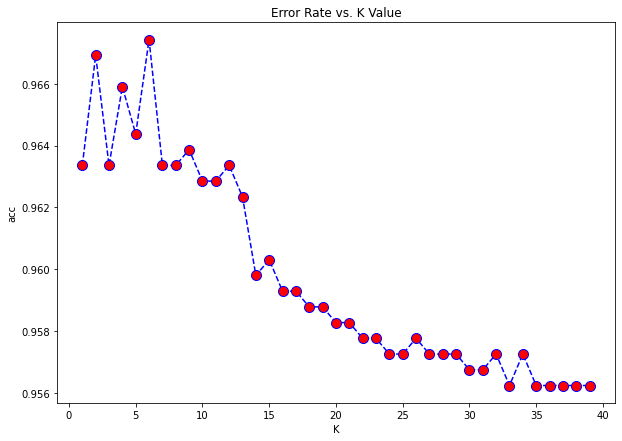

In [31]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
acc = []

for a in range(1, 40):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc.append( accuracy_score(y_test,y_pred))

plt.figure(figsize=(10, 7))
plt.plot(range(1,40),acc,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('acc')

In [32]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [33]:
confusion_matrix(y_test, y_pred)

array([[1845,   21],
       [  49,   50]])

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        None       0.97      0.99      0.98      1866
   instagram       0.70      0.51      0.59        99

    accuracy                           0.96      1965
   macro avg       0.84      0.75      0.78      1965
weighted avg       0.96      0.96      0.96      1965

